In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib inline

In [2]:
# import dataset
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# to create df
df = pd.DataFrame(mall, columns = mall.columns)

In [4]:
# change column Gender to category
df['Gen'] = df['Gender'].astype('category').cat.codes

In [5]:
# to clean my df
mall = df[['Age', 'Annual Income (k$)' ,'Spending Score (1-100)', 'Gen']]
mall.head()

,Age,Annual Income (k$),Spending Score (1-100),Gen
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


### check NAN values

In [6]:
#check NAN value : mall.isnull().sum()
mall.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gen                       0
dtype: int64

### correlation  matrix

In [7]:
corr = mall.corr()

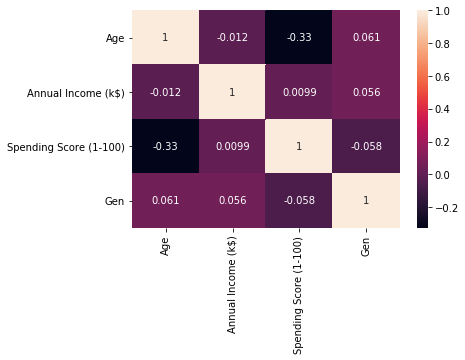

In [8]:
sns.heatmap(corr, annot =True)

In [9]:
#coef = np.corrcoef(mall)

In [10]:
#sns.heatmap(coef)

Text(0, 0.5, '%')

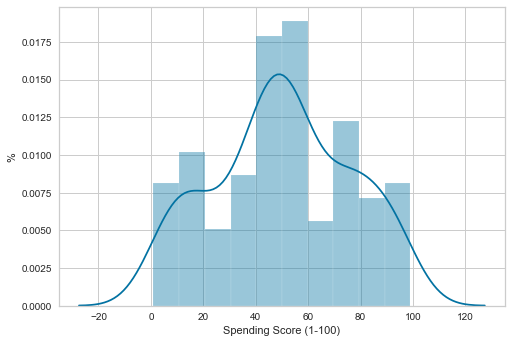

In [50]:
# grapic with 1 numeric variable 
sns.distplot(mall["Spending Score (1-100)"], bins= 10)
plt.ylabel('%')

In [12]:
mall_copy = mall.copy

In [13]:
mall['Gen'].value_counts()

0    112
1     88
Name: Gen, dtype: int64

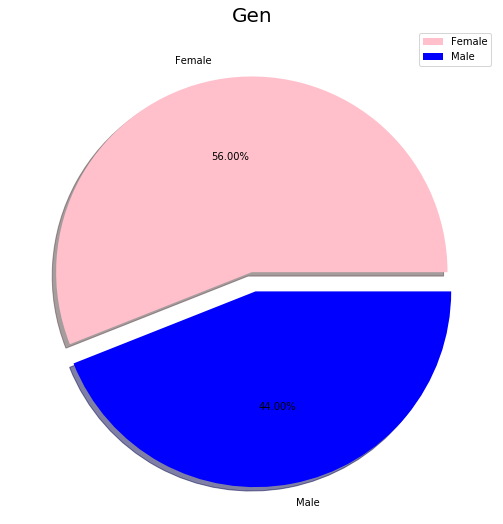

In [14]:
labels = ['Female', 'Male']
size = mall['Gen'].value_counts()
colors = ['PINK', 'BLUE']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gen', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

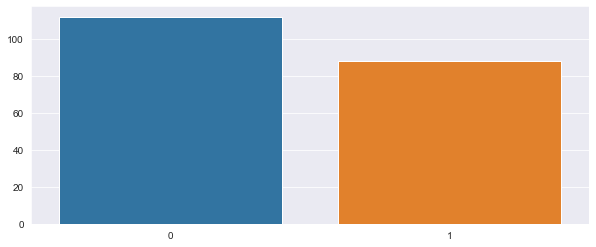

In [15]:
genders = mall.Gen.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

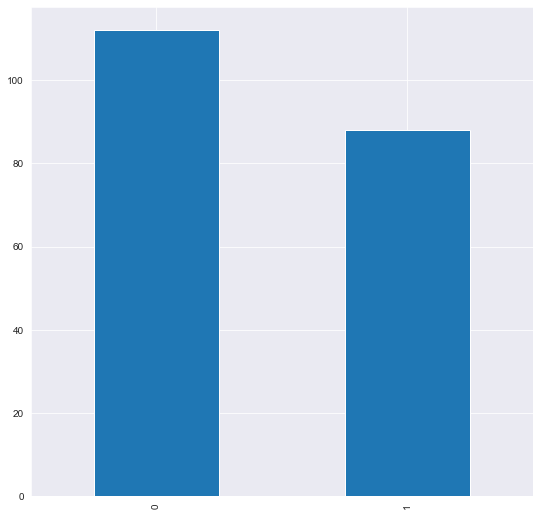

In [16]:
mall['Gen'].value_counts().plot.bar()

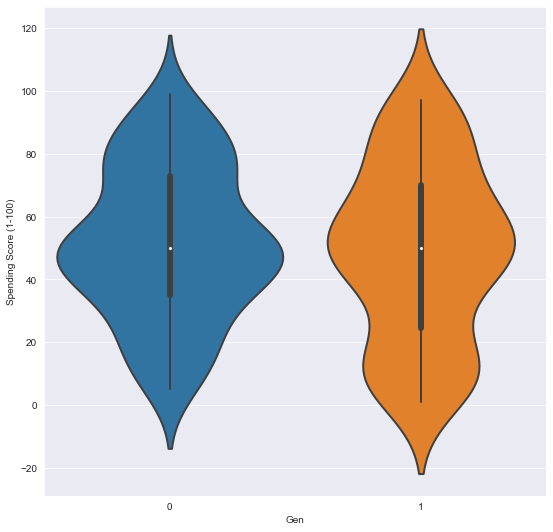

In [17]:
sns.violinplot( x=mall["Gen"], y=mall["Spending Score (1-100)"], linewidth=2, width = 0.9)

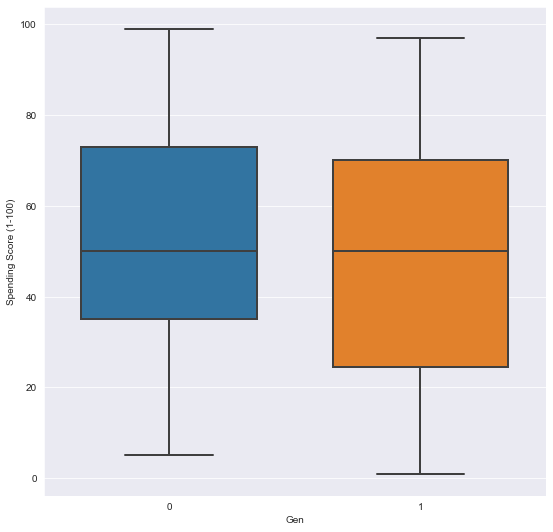

In [18]:
sns.boxplot( x=mall["Gen"], y=mall["Spending Score (1-100)"], linewidth=2, width = 0.7)

In [19]:
#sns.pairplot(mall, height=2, corner = False);

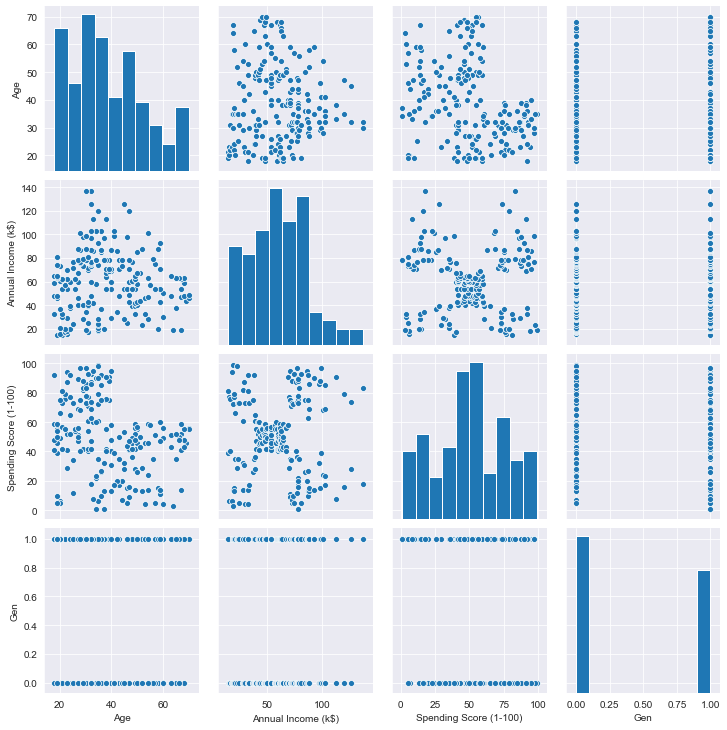

In [20]:
sns.pairplot(mall)

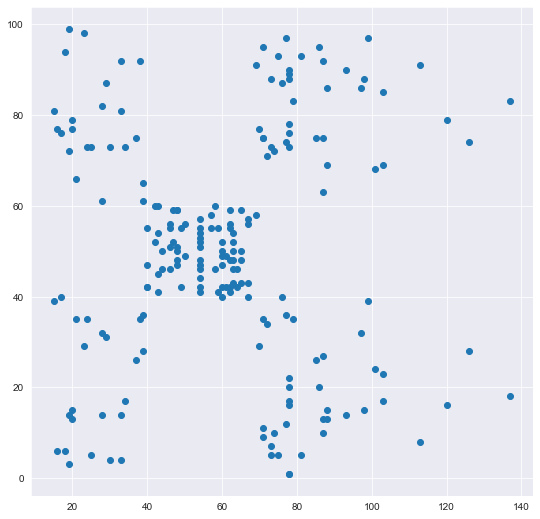

In [22]:
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'])

In [23]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters= 5)#default: n_init=10,maxiter=300,init = Kmean++

In [25]:
model.fit(mall)
labels = model.labels_
centers = model.cluster_centers_

## Enfin, nous allons tracer les clusters pour voir comment nos données ont été regroupées:

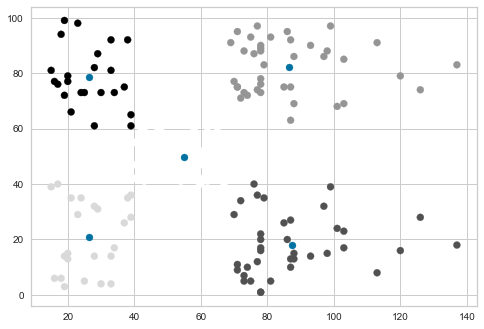

In [51]:
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], c = labels)
plt.scatter(centers[:,1], centers[:,2], c= 'b')
# point rouge position des centroides

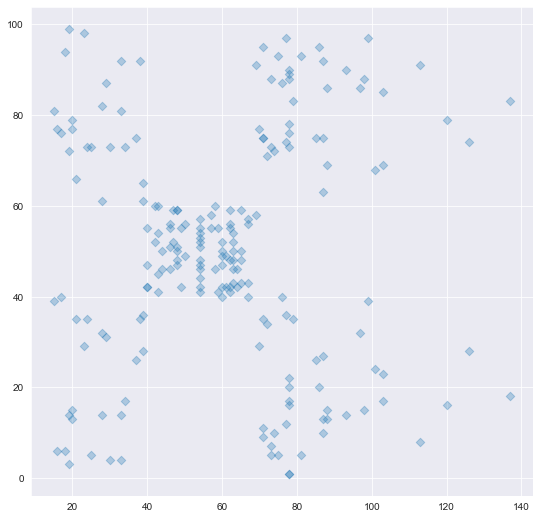

In [27]:
x = mall['Annual Income (k$)']
y = mall['Spending Score (1-100)']
plt.scatter(x, y, alpha=0.3, marker="D")
# permet d'avoir un visuel sur la densitée


### Silhouette

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [29]:
for n_cluster in range(2, 11): #cration d'une boucle de 2 à 10 dont 11 exclu
    kmeans = KMeans(n_clusters= n_cluster).fit(mall)
    label = kmeans.labels_
    sil_coeff = silhouette_score(mall, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29307334005502633
For n_clusters=3, The Silhouette Coefficient is 0.383798873822341
For n_clusters=4, The Silhouette Coefficient is 0.4052954330641215
For n_clusters=5, The Silhouette Coefficient is 0.4402372958247734
For n_clusters=6, The Silhouette Coefficient is 0.45205475380756527
For n_clusters=7, The Silhouette Coefficient is 0.4409411333609709
For n_clusters=8, The Silhouette Coefficient is 0.4333282403082168
For n_clusters=9, The Silhouette Coefficient is 0.4116310808490313
For n_clusters=10, The Silhouette Coefficient is 0.38162205767837293


###  silouette diagramme

In [30]:
!pip install yellowbrick

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


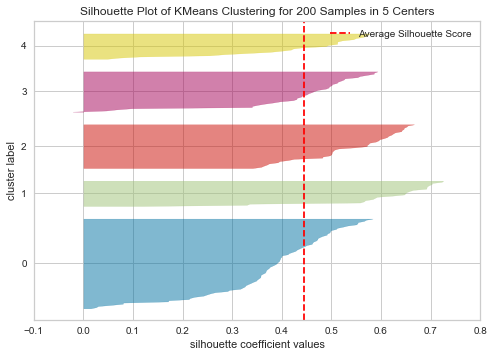

In [31]:

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(mall)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### ELbow method
Il existe des méthodes pour déterminer le nombre de clusters idéal. 
La plus connu est la méthode du coude. Elle s’appuie sur la notion d’inertie. 
On définit cette dernière comme ceci : la somme des distances euclidiennes entre chaque point et son centroïde associé. Evidemment plus on fixe un nombre initial de clusters élevés et plus on réduit l’inertie : 
les points ont plus de chance d’être à côté d’un centroïde. 
Regardons ce que cela donne sur notre exemple : 

In [32]:
inertia = []
K_range = range(1,40)
for K in K_range:
    model = KMeans(n_clusters=K).fit(mall)
    inertia.append(model.inertia_)
inertia

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75427.71182424155,
 58364.96860002742,
 51165.184237107926,
 44359.634641148325,
 40665.351074780214,
 37290.926279437146,
 34605.88258435158,
 32554.939271839274,
 29794.801680775363,
 28128.482236935175,
 26136.725641923433,
 24728.237813629727,
 23145.418976022556,
 21981.500635475637,
 20774.094992030674,
 20322.80114052614,
 18998.338925840242,
 17559.604319455055,
 17182.60088702148,
 16139.440512265513,
 15554.556135531137,
 14900.446955821955,
 14451.977276889776,
 14009.348455710955,
 13359.40159007659,
 12812.103846153846,
 12082.79440836941,
 11819.132203907204,
 11597.339305139303,
 11274.338034188033,
 10538.488442113443,
 10507.175518925518,
 9895.897005772007,
 10047.211219336219,
 9682.653449328449]

Text(0, 0.5, 'cout du module(inertia)')

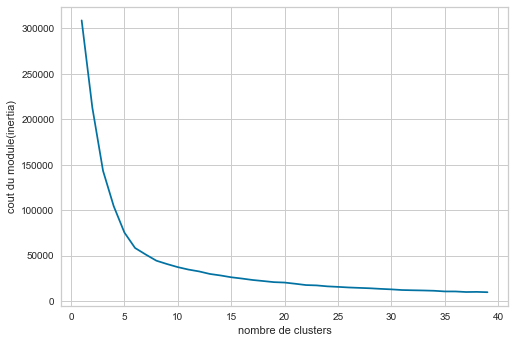

In [33]:
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du module(inertia)')

In [34]:
# Fonction cout: 
model.inertia_

9682.653449328449

In [35]:
model.score(mall)

-9682.653449328487

## MiniBatchKMeans

In [52]:
#ajouter dataviz pour comparaison

In [36]:
from sklearn.cluster import MiniBatchKMeans

In [37]:
m_mini = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=6)

In [38]:
m_mini.partial_fit(mall)

MiniBatchKMeans(batch_size=6, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [39]:
m_mini.cluster_centers_

array([[41.64705882, 88.73529412, 16.76470588,  0.55882353],
       [25.4137931 , 60.82758621, 48.48275862,  0.37931034],
       [49.62337662, 44.38961039, 41.24675325,  0.41558442],
       [24.80952381, 25.61904762, 80.23809524,  0.38095238],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846]])

In [40]:
m_mini.predict(mall)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 4, 1, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

# Classification non supervisée
# Hierarchial Clustering
Méthode de segmentation ascendante

Une première approche consiste à utiliser la Classification Ascendante Hiérarchique (CAH). Le graphe qui en résulte permet de se faire une idée visuelle des différents regroupements et d’intuiter le nombre de classes. Les variables étant toutes numériques, nous utiliserons la distance euclidienne comme mesure de dissimilarité et la distance de “Ward” comme mesure de dissimilarité inter-classe (cette distance vise à maximiser l’inertie inter-classe)


# La Classification Ascendante Hiérarchique : 
CAH est un algorithme non supervisé très connu en matière de Clustering. 
Les champs d’application sont divers : segmentation client, analyse de donnée, segmenter une image, apprentissage semi-supervisé….

Le Principe

C'est une approche ascendante. Il ne détermine pas le nombre de clusters au départ. Il gère chaque échantillon de données comme un cluster, puis les fusionne à l'aide d'une approche ascendante. En cela, la hiérarchie est représentée comme une structure arborescente ou un dendrogramme. 

Étant donnés des points et un entier k, l’algorithme vise à diviser les points en k groupes, appelés clusters, homogènes etpacts. 


# LA distance euclidienne permet d’évaluer la distance entre les centroïdes.

# Rôle des dendrogrammes pour le clustering hiérarchique

Une fois qu'un grand cluster est formé par la combinaison de petits clusters.
Les dendrogrammes du cluster sont utilisés pour diviser réellement le cluster en plusieurs clusters de points de données connexes. Voyons comment cela se fait.

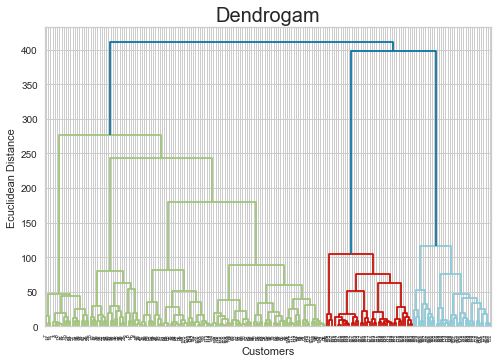

In [41]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(mall, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Maintenant que nous connaissons le nombre de clusters pour notre ensemble de données, l'étape suivante consiste à regrouper les points de données dans ces 6 clusters. 
Pour ce faire, nous utiliserons à nouveau la méthode AgglomerativeClusteringclasse de la sklearn.clusterbibliothèque. 

In [42]:
from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

In [43]:
# On entraine notre modèle avec l'algo AgglomerativeClustering

In [44]:
model_agg.fit(mall)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [45]:
model_agg.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [46]:
labels_agg = model_agg.labels_

In [47]:
mall['label'] = model_agg.labels_

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
mall

,Age,Annual Income (k$),Spending Score (1-100),Gen,label
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,0
197,32,126,74,1,2
198,32,137,18,1,0


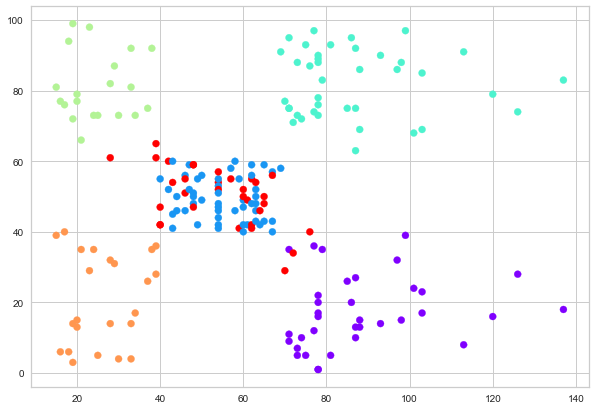

In [49]:
plt.figure(figsize=(10, 7))
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], c=labels_agg, cmap='rainbow')